<a href="https://colab.research.google.com/github/fallou2024/capture-d-cran-git/blob/master/Africa_Climat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly==5.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [9]:
df=pd.read_csv("Africa_climate_change.csv",sep=",")
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [ ]:
path="Africa_climate_change.csv"
df=pd.read_csv(path)
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [ ]:
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,177575.000000,458439.000000,363901.000000,332757.000000
mean,0.120941,77.029838,88.713969,65.548262
std,0.486208,11.523634,13.042631,11.536547
min,0.000000,-49.000000,41.000000,12.000000
25%,0.000000,70.000000,81.000000,58.000000
50%,0.000000,80.000000,90.000000,68.000000
75%,0.010000,85.000000,99.000000,74.000000
max,19.690000,110.000000,123.000000,97.000000


In [ ]:
df.isnull().sum()

,0
DATE,0
PRCP,287240
TAVG,6376
TMAX,100914
TMIN,132058
COUNTRY,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
!pip install pandas matplotlib

In [ ]:
#un graphique linéaire pour montrer les fluctuations de température moyenne en Tunisie et au Cameroun
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [17]:
# Filtrer les données entre 1980 et 2005 pour la Tunisie et le Cameroun
df_filtered = df[(df['DATE'] >= '1980-01-01') & (df['DATE'] <= '2005-12-31')]


In [19]:
# Filtrer pour les pays
df_tun = df_filtered[df_filtered['COUNTRY'] == 'Tunisia']
df_cam = df_filtered[df_filtered['COUNTRY'] == 'Cameroon']


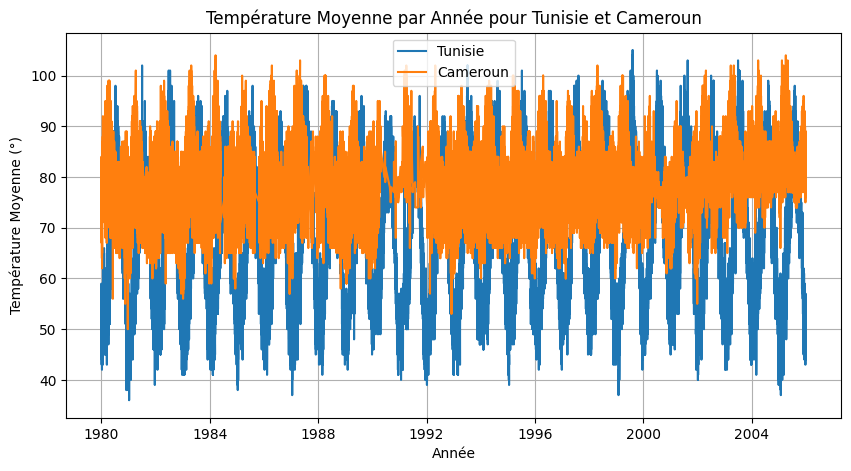

In [23]:
# Tracer les courbes de température moyenne
plt.figure(figsize=(10, 5))
plt.plot(df_tun['DATE'], df_tun['TAVG'], label='Tunisie')
plt.plot(df_cam['DATE'], df_cam['TAVG'], label='Cameroun')
plt.xlabel('Année')
plt.ylabel('Température Moyenne (°)')
plt.title('Température Moyenne par Année pour Tunisie et Cameroun')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# 5. Histogrammes pour le Sénégal
plt.figure(figsize=(12,6))
df_senegal_1980_2000 = df[(df['COUNTRY'] == 'Senegal') & (df['DATE'].dt.year.between(1980, 2000))]
df_senegal_2000_2023 = df[(df['COUNTRY'] == 'Senegal') & (df['DATE'].dt.year.between(2000, 2023))]


<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Fréquence')

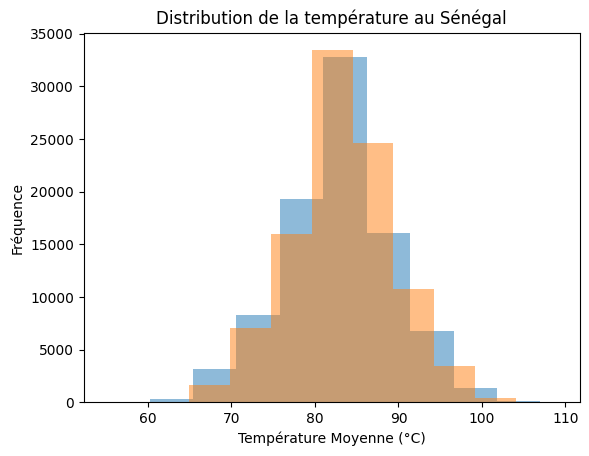

In [26]:
plt.hist(df_senegal_1980_2000['TAVG'], alpha=0.5, label='1980-2000')
plt.hist(df_senegal_2000_2023['TAVG'], alpha=0.5, label='2000-2023')
plt.title('Distribution de la température au Sénégal')
plt.xlabel('Température Moyenne (°C)')
plt.ylabel('Fréquence')

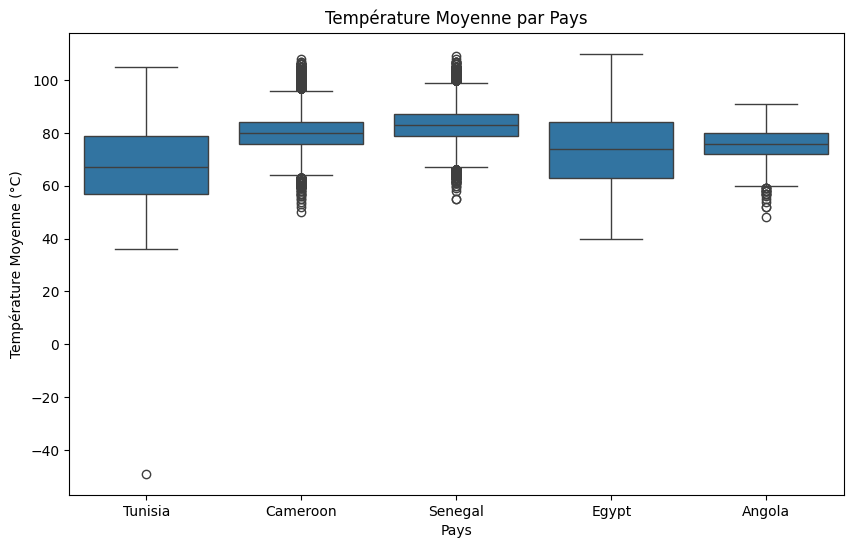

In [27]:
# 6. Box plot pour les températures moyennes par pays
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='COUNTRY', y='TAVG')
plt.title('Température Moyenne par Pays')
plt.xlabel('Pays')
plt.ylabel('Température Moyenne (°C)')
plt.show()